# Chapter 1: Getting Started with Python Machine Learning

Goal of machine learning (ML): teach machines to carry out tasks by providing them with a few examples of how to do (or not to do) the specified task.

Example: automate a repetitive task such as sorting daily email. One way to do it would be to write down all the rules used when processing the emails. This is cumbersome and imperfect - some rules will be missed, others will be overspecified. A better and more future-proof way would be to automate the whole process by choosing a set of email metadata and body/folder name pairs, then let an algorithm come up with the best rule set. The pairs would be the **training data**, and the resulting rule set or **model** could then be applied to future emails.

The process of coming up with a decent ML approach is never straightforward. Typically one goes back and forth in the analysis, trying out different versions of data on diverse sets of ML algorithms. This explorative nature means that interpreted high-level languages such as Python are better suited to the task.

A typical workflow is sketched below. Note that only the fourth step actually deals with ML algorithms!

#### Reading in the data and cleaning it
The first step is to read in the data, then review it and decide how to handle invalid or missing values. This step is more an art than a precise science.

#### Exploring and understanding the input data
Get a feeling of what the data is like - is it enough to answer the question? Is it too much?

#### Analysing how best to present the data to the learning algorithm
Often the data isn't fed directly into the ML algorithm; instead, parts of it can be refined before training for increased performance. This part of the workflow is called **feature engineering**.

#### Choosing the right model and learning algorithm
This is a thoughtful process of weighing different performance and functional requirements, not just trying out the three or four algorithms you know about.

#### Measuring the performance correctly
Determine if your undertaking fails or succeeds.

## Resources
- http://metaoptimize.com/qa: Q&A site focused on ML topics
- http://stats.stackexchange.com: Cross Validated, similar to MetaOptimize but focused on statistics
- http://stackoverflow.com: broader focus on general programming topics
- `#machinelearning` on https://freenode.net: IRC channel focused on machine learning topics
- http://www.TwoToReal.com: Q&A site written by the book's authors
- http://blog.kaggle.com: ML competitions

## Getting started
Python is slow for many numerically heavy algorithms - NumPy and SciPy handle this by offloading number crunching tasks to lower level C or Fortran extensions. NumPy provides the support of highly optimized multidimensional arrays (data structure) and SciPy uses those arrays to provide fast numerical recipes. Finally, matplotlib is a convenient, feature-rich library to plot high-quality graphs using Python.

### Anaconda Python setup
Create an environment for the book's examples with

``` bash
conda create --name mlpython numpy scipy matplotlib jupyter
```

### Basic NumPy

In [1]:
import numpy as np

np.version.full_version

'1.11.1'

A NumPy array is created just like a Python list:

In [4]:
a = np.array([0, 1, 2, 3, 4, 5])
a.ndim

1

In [6]:
a.shape

(6,)

Transform this array to a two-dimensional matrix:

In [7]:
b = a.reshape((3, 2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
b.ndim

2

In [9]:
b.shape

(3, 2)

To optimise, `b` is not a copy of `a`, rather a *view* of it: changes made to `b` are immediately reflected on `a` as well.

In [10]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [11]:
a

array([ 0,  1, 77,  3,  4,  5])

To create a true copy use the `.copy()` method:

In [14]:
c = a.reshape((3, 2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [15]:
c[0][0] = -99
a

array([ 0,  1, 77,  3,  4,  5])

In [16]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In NumPy arrays operations are propagated to the individual elements (in ordinary Python lists, multiplication creates a new list with $n$ copies of the original).

In [18]:
d = np.array([1, 2, 3, 4, 5])
d*2

array([ 2,  4,  6,  8, 10])

In [19]:
d**2

array([ 1,  4,  9, 16, 25])

In [20]:
# An ordinary Python list
[1, 2, 3, 4, 5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

#### Indexing
In addition to normal list indexing, arrays themselves can be used as indices:

In [21]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

Together with the fact that conditions are also propagated to individual elements, we gain a very convenient way to access data:

In [22]:
a > 4

array([False, False,  True, False, False,  True], dtype=bool)

In [23]:
a[a > 4]

array([77,  5])

Clip the values at both ends of an interval (useful for removing outliers):

In [24]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

#### Handling nonexisting values
Data will often contain invalid values that we will mark as not being a real number using NumPy's `.NAN`.

In [26]:
c = np.array([1, 2, np.NAN, 3, 4])
c

array([  1.,   2.,  nan,   3.,   4.])

In [27]:
np.isnan(c)

array([False, False,  True, False, False], dtype=bool)

In [29]:
c[~np.isnan(c)]

array([ 1.,  2.,  3.,  4.])

In [30]:
np.mean(c[~np.isnan(c)])

2.5

#### Comparing the runtime of NumPy versus normal Python lists
Calculate the sum of all squared numbers from 1 to 1000, repeated 10,000 times.

In [33]:
from __future__ import print_function
import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)

naive_np_sec = timeit.timeit('sum(na*na)',
                            setup="import numpy as np; na=np.arange(1000)",
                            number=10000)

good_np_sec = timeit.timeit('na.dot(na)',
                           setup="import numpy as np; na=np.arange(1000)",
                           number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.838769 sec
Naive NumPy: 1.056357 sec
Good NumPy: 0.018632 sec


Note that **just using NumPy as data storage takes longer than standard Python** - only when applying methods from the optimised extension do we get the speed improvement.

This speed comes at a price: NumPy arrays are not as flexible as Python lists, and can only contain elements of a single data type. If we try to use elements of different types, NumPy with try to coerce them to a single data type.

In [36]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [37]:
np.array([1, "stringy"])

array(['1', 'stringy'], 
      dtype='|S21')

In [38]:
np.array([1, "stringy", set([1, 2, 3])])

array([1, 'stringy', set([1, 2, 3])], dtype=object)

### Basic SciPy

For convenience, the complete namespace of NumPy is also accesible via SciPy. So, from now on, we will use NumPy's machinery via the SciPy namespace.

In [42]:
import scipy as sp

sp.version.full_version

'0.18.0'

In [43]:
sp.dot is np.dot

True

The diverse algorithms are grouped into the following toolboxes:

SciPy packages | Functionalities
---------------|----------------
`cluster` | <ul><li>Hierarchical clustering (`cluster.hierarchy`)</li><li>Vector quantization / k-means (`cluster.vq`)</li></ul>
`constants` | <ul><li>Physical and mathematical constants</li><li>Conversion methods</li></ul>
`fftpack` | Discrete Fourier transform algorithms
`integrate` | Integration routines
`interpolate` | Interpolation (linear, cubic etc)
`io` | Data I/O
`linalg` | Linear algebra routines using BLAS and LAPACK libraries
`ndimage` | $n$-dimensional image package
`odr` | Orthogonal distance regression
`optimize` | Optimization (finding minima and roots)
`signal` | Signal processing
`sparse` | Sparse matrices
`spatial` | Spatial data structures and algorithms
`special` | Special mathematical functions (Bessel, Jacobian)
`stats` | Statistics toolkit



## First ML example
Hypothetical example: a web start-up which provides services via HTTP needs to plan for better infrastructure to serve all incoming web requests successfully. They need to know in advance when they will hit the limit of their current infrastructure, estimated at 100,000 requests per hour.

In [44]:
url = "https://raw.githubusercontent.com/luispedro/BuildingMachineLearningSystemsWithPython/master/ch01/data/web_traffic.tsv"
data = sp.genfromtxt(url, delimiter="\t")

In [45]:
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [46]:
print(data.shape)

(743, 2)


### Preprocessing and cleaning the data
It is more convenient for SciPy to separate the dimensions into two vectors: `x` to contain the hours and `y` to contain the Web hits in that particular hour.

In [47]:
x = data[:,0]
y = data[:,1]

We have some values in `y` that contain invalid values (`nan`). First check how many:

In [48]:
sp.sum(sp.isnan(y))

8

This is a small fraction of the total - we can afford to remove them.

In [49]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

To get a first impression of the data, create a scatter plot:

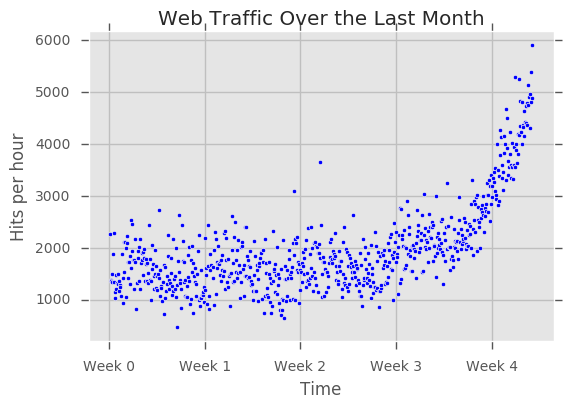

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

# Draw a slightly opaque, dashed grid
plt.grid(True, linestyle="-", color='0.75')
plt.show();

### Choosing the right model and learning algorithm
How long will the server handle the incoming web traffic? To answer this we have to do the following:

1. Find the real model behind the noisy data points
2. Following this, use the model to extrapolate into the future to find the point in time where the infrastructure has to be extended

Models can be thought of as simplified theoretical approximations of complex reality - as such there's always an approximation error involved. One way to estimate this error is to compute the squared distance of the model's prediction to the real data. For example, for a learned model function `f`,

In [64]:
def error(f, x, y):
    return sp.sum((f(x) - y)**2)

#### Starting with a simple straight line
The challenge is how to best choose the parameters of the straight line so that it has the smallest approximation error. This is done by SciPy's `polyfit()` function.

In [61]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

- `fp1`: parameters of the fitted model function
- `full=True`: get additional background information on the fitting process

The fit residuals are exactly the error of the approximation:

In [62]:
print("Model parameters: %s" % fp1)
print(residuals)

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


Now use `poly1d()` to create a model function from the model parameters:

In [65]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


Plot this first trained model:

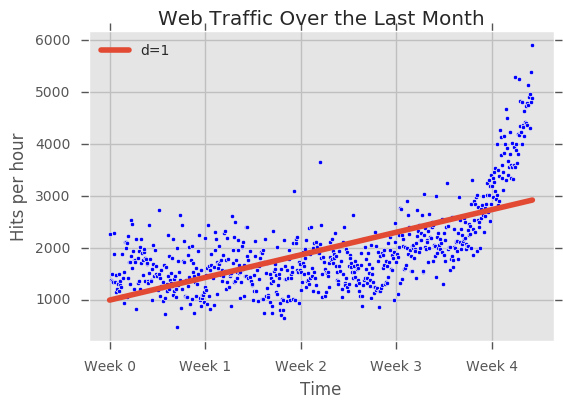

In [67]:
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)    # Generate x values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.grid(True, linestyle="-", color='0.75')
plt.show();

The absolute value of the error is seldom of use in isolation. However, when comparing two competing models, we can use their errors to judge which one of them is better. Although this first model clearly isn't the one we would use, it serves as a baseline to compare other models.

#### More advanced stuff
Now fit a polynomial of degree 2:

In [68]:
f2p = sp.polyfit(x, y, 2)
print(f2p)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [69]:
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

179983507.878


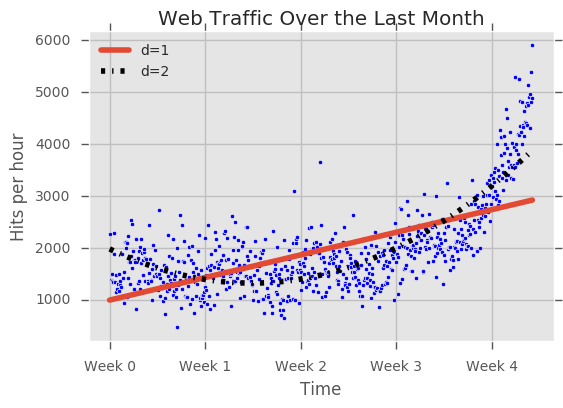

In [73]:
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, x[-1], 1000)    # Generate x values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, f2(fx), linewidth=4, linestyle='dashdot', color='black')
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")

plt.grid(True, linestyle="-", color='0.75')
plt.show();

The error is lower, at the price of increased complexity. Trying polynomials of degrees 3, 10, and 100:

In [74]:
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)

f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)

f100p = sp.polyfit(x, y, 100)
f100 = sp.poly1d(f100p)

/home/tomas.tecce/anaconda2/envs/mlpython/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/tomas.tecce/anaconda2/envs/mlpython/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Note that in the case of $n$ = 100, because of numerical errors `polyfit` cannot determine a good fit.

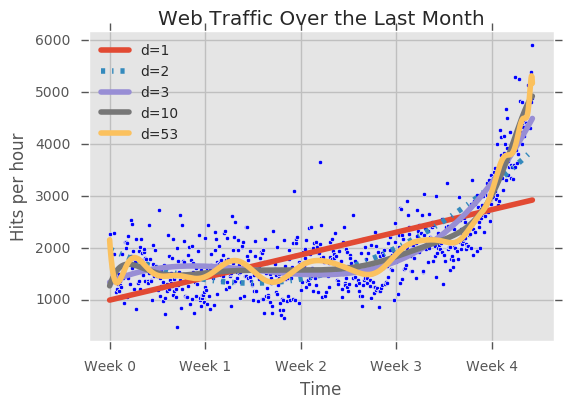

In [76]:
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, f2(fx), linewidth=4, linestyle='dashdot')
plt.plot(fx, f3(fx), linewidth=4)
plt.plot(fx, f10(fx), linewidth=4)
plt.plot(fx, f100(fx), linewidth=4)
plt.legend(["d=%i" % f1.order,
            "d=%i" % f2.order,
            "d=%i" % f3.order,
            "d=%i" % f10.order,
            "d=%i" % f100.order], loc="upper left")

plt.grid(True, linestyle="-", color='0.75')
plt.show();

In [79]:
print("Error d=1: %f" % error(f1, x, y))
print("Error d=2: %f" % error(f2, x, y))
print("Error d=3: %f" % error(f3, x, y))
print("Error d=10: %f" % error(f10, x, y))
print("Error d=100: %f" % error(f100, x, y))

Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363550
Error d=100: 109452399.841428


As the models get more complex, the errors decrease - but do they capture the true process that generates the data? The highest-order models shows oscillating behaviour - it is capturing not only the underlying process, but also the noise. This is called **overfitting**.

At this point the options are:

- Choosing one of the polynomial models
- Switching to another, more complex model class (e.g. splines)
- Thinking differently about the data and start again

Out of the five fitted models, the first order model is clearly too simple, and those of order 10 and 100 are overfitting the data. However, if we extrapolate the order 2 and 3 models it's not clear they capture the trend accurately, as the plot below shows. At this point we probably should go back and review the source data.

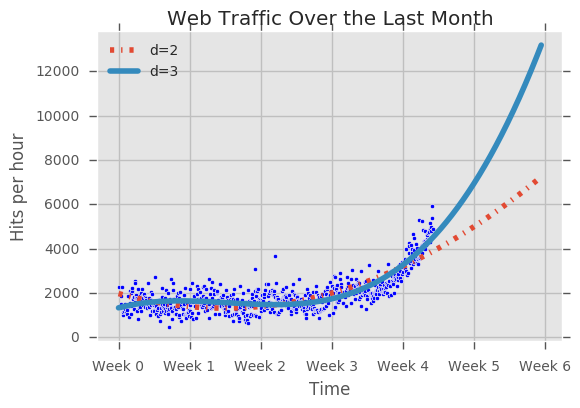

In [84]:
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fx = sp.linspace(0, 1000, 1000) 
plt.plot(fx, f2(fx), linewidth=4, linestyle='dashdot')
plt.plot(fx, f3(fx), linewidth=4)
plt.legend(["d=%i" % f2.order,
            "d=%i" % f3.order], loc="upper left")

plt.grid(True, linestyle="-", color='0.75')
plt.show();

#### Another look at the data
There seems to be an inflection point between weeks #3 and #4, so we can train two straight lines using week 3.5 as a separation point.

In [87]:
inflection = int(3.5*7*24)    # Calculate the inflection point in hours
xa = x[:inflection]           # Data before the inflection point
ya = y[:inflection]
xb = x[inflection:]           # Data after the inflection
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


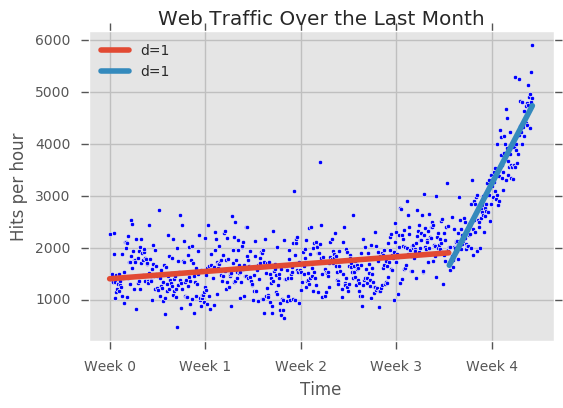

In [91]:
plt.scatter(x, y, s=10)
plt.title("Web Traffic Over the Last Month")
plt.xlabel("Time")
plt.ylabel("Hits per hour")
plt.xticks([w*7*24 for w in range(10)],
          ['Week %i' % w for w in range(10)])
plt.autoscale(tight=True)

fxa = sp.linspace(0, xa[-1], 1000) 
fxb = sp.linspace(xb[0], xb[-1], 1000)
plt.plot(fxa, fa(fxa), linewidth=4)
plt.plot(fxb, fb(fxb), linewidth=4)
plt.legend(["d=%i" % fa.order,
            "d=%i" % fb.order], loc="upper left")

plt.grid(True, linestyle="-", color='0.75')
plt.show();

The combination of the two straight lines seems to be a much better fit to the data than anything we have modeled before, but the combined error is higher than the higher order polynomials. However, the two straight lines model is better at predicting future data: the higher order polynomials overfit, wherease the lower order models do not capture the data well enough - they **underfit** the data.

Another approach would be to consider that things have changed significantly after week #3 and only the data points for week #4 are representative of the future situation. In that case we could fit higher order models only to that data, and evaluate which model has the lowest error. This will, again, result in the lowest score for the more complex model - we need an additional test to be able to decide.

#### Training and testing
To be able to test the models, hold out a part of the data and train on the remaining dataset. Then use the held-out data to calculate the error. As the model has been trained not knowing the held-out data, we should get a more realistic picture of how the model will behave in the future.

Training only on the data after the inflection point: